In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df_properties_2016 = pd.read_csv("properties_2016.csv")

/home/sgu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
x = df_properties_2016.taxvaluedollarcnt.values
x = x[~np.isnan(x)]
np.percentile(x, np.clip(np.arange(0,101,10),1,99)) #1%-99

array([   25443.  ,    86334.  ,   151631.2 ,   205206.8 ,   253410.  ,
         306086.  ,   365879.  ,   440156.2 ,   551000.  ,   766771.6 ,
        2330146.34])

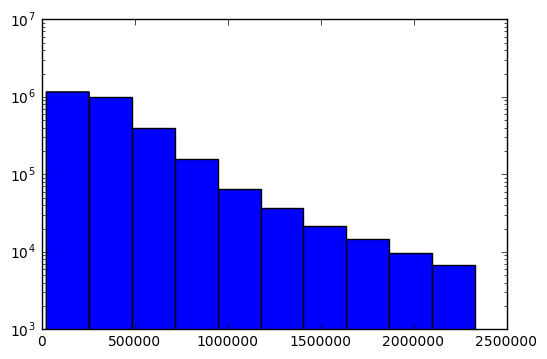

In [5]:
plt.hist(x[np.logical_and(x>25443, x<2330147)],bins=10);
plt.yscale('log')
plt.show()

In [6]:
#bins are left-closed-right-open except the last one which is closed at two ends. 
_,bins = np.histogram(x[np.logical_and(x>25443, x<2330147)],bins=10) 

In [7]:
pd.cut(np.arange(0,4),bins=[0,1,2,3,4],right=False)

[[0, 1), [1, 2), [2, 3), [3, 4)]
Categories (4, object): [[0, 1) < [1, 2) < [2, 3) < [3, 4)]

In [8]:
df_train_2016 = pd.read_csv("train_2016_v2.csv") #90275 rows 
df_train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [9]:
df_train_2016.transactiondate.str.extract(r'^(\d\d\d\d)').unique()

/home/sgu/miniconda2/envs/GAPM/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


array(['2016'], dtype=object)

In [10]:
df_train_2016 = df_train_2016.merge(df_properties_2016[['parcelid','taxvaluedollarcnt']], on='parcelid')

In [11]:
sel = ~ df_train_2016.taxvaluedollarcnt.isnull()
df_train_2016 = df_train_2016[sel] #90274 rows 

In [12]:
df_train_2016.head()

,parcelid,logerror,transactiondate,taxvaluedollarcnt
0,11016594,0.0276,2016-01-01,360170.0
1,14366692,-0.1684,2016-01-01,585529.0
2,12098116,-0.0040,2016-01-01,119906.0
3,12643413,0.0218,2016-01-02,244880.0
4,14432541,-0.0050,2016-01-02,434551.0


In [13]:
#check whether there is a relationship between the logerror and the taxvalue 
#note that bins only contains the 1%-99%, the <1% (resp. >99%) will becomes the 0th and 11th bin. the design of the np.digitize is very natural and convenient

df = df_train_2016.assign(price_brackets=lambda df:np.digitize(df.taxvaluedollarcnt, bins=bins))
df.head()

,parcelid,logerror,transactiondate,taxvaluedollarcnt,price_brackets
0,11016594,0.0276,2016-01-01,360170.0,2
1,14366692,-0.1684,2016-01-01,585529.0,3
2,12098116,-0.0040,2016-01-01,119906.0,1
3,12643413,0.0218,2016-01-02,244880.0,1
4,14432541,-0.0050,2016-01-02,434551.0,2


In [14]:
bins

array([   25444. ,   255914.2,   486384.4,   716854.6,   947324.8,
        1177795. ,  1408265.2,  1638735.4,  1869205.6,  2099675.8,
        2330146. ])

In [15]:
df.price_brackets.value_counts()

2     31664
1     31318
3     14097
4      5883
5      2428
6      1462
11     1034
7       845
8       568
9       418
10      286
0       271
Name: price_brackets, dtype: int64

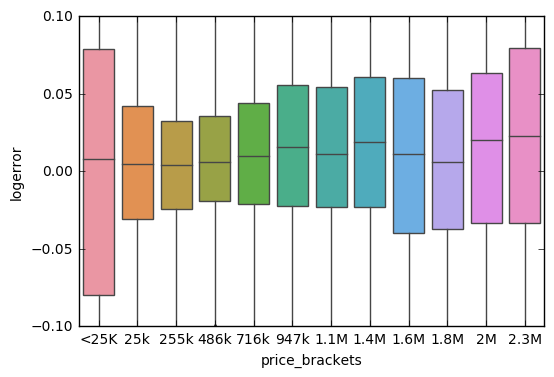

In [16]:
sns.boxplot(x='price_brackets', y='logerror',data=df)
plt.ylim(-0.1,0.1)
plt.xticks(range(0,12),['<25K','25k','255k','486k','716k','947k','1.1M','1.4M','1.6M','1.8M','2M','2.3M','>2,3M'])
plt.show()

In [17]:
# zillow prediction is very good! Within 10**0.02=4% for all priceband. 
# all sign are positive, zestimate overestimate the price
df.groupby('price_brackets').logerror.median()

price_brackets
0     0.0080
1     0.0050
2     0.0040
3     0.0060
4     0.0100
5     0.0159
6     0.0109
7     0.0188
8     0.0114
9     0.0060
10    0.0203
11    0.0227
Name: logerror, dtype: float64